# 1. Data Engineering to Preprocess Data for EDA of Job Market 
The project begins with the meticulous acquisition and preprocessing of job market data sourced from diverse repositories, including CSV files and databases. This involves essential data cleaning steps such as handling missing values, standardizing data types, and removing duplicates to ensure the dataset's integrity and reliability. 

Data:  A big dataset comprising over 1.6 million global records with 23 features spanning 25 months from September 2021 to September 2023 was collected from Kaggle. You can get the data here: https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset

## Notebook Breakdown:
- Installing and Importing Required Resources
- Loading Data: The CSV data file will be loaded to initiate data exploration and preprocessing.
- Removing Unnecessary Features: Only the most valuable features for analysis will be retained, while less significant columns will be discarded.
- Handling Missing Values: Various techniques will be employed to effectively address missing values, ensuring minimal impact on analysis outcomes.
- Splitting Range Data: Ranges such as salary or experience ranges will be segregated into separate columns to facilitate analysis.
- Eliminating Duplicate Features: Duplicate entries and extraneous features will be identified and removed to enhance dataset quality. Any blank entries will be identified and handled appropriately.
- Data Type Conversion: Ensuring accurate data types for each feature is crucial for conducting precise analysis.
- Saving the Processed Data: After completing all preprocessing steps, the new DataFrame will be saved as a CSV file for further analysis in subsequent notebooks.

By meticulously executing these preprocessing steps, the dataset will be prepared for in-depth analysis, ensuring robustness and reliability in uncovering actionable insights into the dynamic job market landscape.

### Importing Required Resources

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Loading and Visualizing Data

In [2]:
df = pd.read_csv("job_descriptions.csv")
print(df.head(3))
print(df.info())  # Use df.info() to get column names and types

             Job Id     Experience Qualifications Salary Range  location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K   Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K  Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K     Macao   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern         26801  ...   
1      Turkmenistan   38.9697    59.5563     Intern        100340  ...   
2  Macao SAR, China   22.1987   113.5439  Temporary         84525  ...   

                Contact                     Job Title  \
0  001-381-930-7517x737  Digital Marketing Specialist   
1          461-509-4216                 Web Developer   
2            9687619505            Operations Manager   

                      Role    Job Portal  \
0     Social Media Manager      Snagajob   
1   Frontend Web Developer      Idealist   
2  Quality Control Manager  Jobs2Care

### Removing Unnecessary Features

In [3]:
features_to_exclude = ['Job Id', 'Contact', 'Contact Person']
df = df.drop(columns=features_to_exclude)
print(df.head(3))

      Experience Qualifications Salary Range  location           Country  \
0  5 to 15 Years         M.Tech    $59K-$99K   Douglas       Isle of Man   
1  2 to 12 Years            BCA   $56K-$116K  Ashgabat      Turkmenistan   
2  0 to 12 Years            PhD   $61K-$104K     Macao  Macao SAR, China   

   latitude  longitude  Work Type  Company Size Job Posting Date Preference  \
0   54.2361    -4.5481     Intern         26801       2022-04-24     Female   
1   38.9697    59.5563     Intern        100340       2022-12-19     Female   
2   22.1987   113.5439  Temporary         84525       2022-09-14       Male   

                      Job Title                     Role    Job Portal  \
0  Digital Marketing Specialist     Social Media Manager      Snagajob   
1                 Web Developer   Frontend Web Developer      Idealist   
2            Operations Manager  Quality Control Manager  Jobs2Careers   

                                     Job Description  \
0  Social Media Managers 

### Handling Missing Values

In [4]:
for col in df.columns:
    print(f"Column '{col}' has {df[col].isnull().sum()} missing values.")

#   * For 'Salary Range,' split the range into two columns ('Lower Salary,' 'Upper Salary') and then fill missing values with the median of each.
df[['Lower Salary', 'Upper Salary']] = df['Salary Range'].str.replace('$', '', regex=False).str.replace('K', '000', regex=False).str.split('-', expand=True)

for col in ['Lower Salary', 'Upper Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df.drop(columns=['Salary Range'], inplace=True)


#   * For categorical columns, fill missing values with the mode.
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#   * For 'Company Size,' fill missing values with the median.
df['Company Size'].fillna(df['Company Size'].median(), inplace=True)

Column 'Experience' has 0 missing values.
Column 'Qualifications' has 0 missing values.
Column 'Salary Range' has 0 missing values.
Column 'location' has 0 missing values.
Column 'Country' has 0 missing values.
Column 'latitude' has 0 missing values.
Column 'longitude' has 0 missing values.
Column 'Work Type' has 0 missing values.
Column 'Company Size' has 0 missing values.
Column 'Job Posting Date' has 0 missing values.
Column 'Preference' has 0 missing values.
Column 'Job Title' has 0 missing values.
Column 'Role' has 0 missing values.
Column 'Job Portal' has 0 missing values.
Column 'Job Description' has 0 missing values.
Column 'Benefits' has 0 missing values.
Column 'skills' has 0 missing values.
Column 'Responsibilities' has 0 missing values.
Column 'Company' has 0 missing values.
Column 'Company Profile' has 5478 missing values.


### Splitting Range Data

In [5]:
#   * Split the 'Experience' column into 'Min_Experience' and 'Max_Experience.'
df[['Min_Experience', 'Max_Experience']] = df['Experience'].str.replace('Years', '', regex=False).str.replace('Year', '', regex=False).str.split('to', expand=True)

for col in ['Min_Experience', 'Max_Experience']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df.drop(columns=['Experience'], inplace=True)

### Eliminating Duplicate Features

In [6]:
#   * Remove duplicate rows.
df.drop_duplicates(inplace=True)

#   * Handle blank entries (already handled by filling NaNs).

# ### Data Type Conversion

#   * Convert 'Company Size' to integer.
df['Company Size'] = df['Company Size'].astype(int)

#   * Convert 'Job Posting Date' to datetime.
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')
df.dropna(subset=['Job Posting Date'], inplace=True) # Remove rows where 'Job Posting Date' is NaT

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Qualifications    1615940 non-null  object        
 1   location          1615940 non-null  object        
 2   Country           1615940 non-null  object        
 3   latitude          1615940 non-null  float64       
 4   longitude         1615940 non-null  float64       
 5   Work Type         1615940 non-null  object        
 6   Company Size      1615940 non-null  int32         
 7   Job Posting Date  1615940 non-null  datetime64[ns]
 8   Preference        1615940 non-null  object        
 9   Job Title         1615940 non-null  object        
 10  Role              1615940 non-null  object        
 11  Job Portal        1615940 non-null  object        
 12  Job Description   1615940 non-null  object        
 13  Benefits          1615940 non-null  object

### Saving the Processed Data

In [7]:

df.to_csv("processed_job_descriptions.csv", index=False)

# 2. Exploring Skill, Jobs, and Qualifications Demands in Market using PySpark

This project delves into a comprehensive analysis of skill demand trends within the job market. The primary objective here is to reveal underlying demands in job roles.

## Notebook Breakdown

- Importing Required Resources

- Data Loading and Visualization

- Market Demand Analysis:

   1. **Most Demanding Skills:** The most in-demand skills are extracted from the dataset. This analysis provides insights into the skills sought after by employers, shedding light on emerging trends and preferences in the job market.

   2. **Least Demanding Skills:** Conversely, the least demanded skills are identified to discern patterns of declining relevance or niche skill requirements in the market.

   3. **Most Demanding Qualifications:** The qualifications most frequently requested by employers are examined, highlighting educational backgrounds and credentials preferred in the current job landscape.

   4. **Most Demanding Jobs:** Identify the most sought-after jobs in the market. This analysis offers insights into the types of roles experiencing high demand in current market and provides context for talent acquisition strategies.

   5. **Least Demanding Jobs:** Similarly, the least demanded job titles are explored to understand roles with lower demand or declining relevance in the job market.

The project aims to provide stakeholders with actionable insights, enabling informed decision-making and strategic planning for talent acquisition and skill development initiatives.

## Importing Required Libraies 

In [8]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

### Load the spaCy English model

In [ ]:
nlp = spacy.load("en_core_web_sm")  # Or a larger model like "en_core_web_lg"

### Load the dataset

In [10]:
df = pd.read_csv("processed_job_descriptions.csv")

### Preprocessing function

In [13]:

def extract_skills(text):
    if isinstance(text, str):
        doc = nlp(text)
        skills = []
        for token in doc:
            # 1. POS Tagging for Nouns and Proper Nouns (Base)
            if token.pos_ in ['NOUN', 'PROPN']:
                skills.append(token.text)

            # 2. Enhanced NER (Named Entity Recognition)
            if token.ent_type_ == "ORG" or token.ent_type_ == "PRODUCT" or token.ent_type_ == "TECHNOLOGY":
              skills.append(token.text)

        # 3. Normalization (Lowercase and Lemmatization)
        skills = [token.lemma_.lower() for token in doc if token.pos_ in ['NOUN', 'PROPN'] or token.ent_type_ in ["ORG" , "PRODUCT" , "TECHNOLOGY"]]
        
        # 4. Remove Stop Words and Punctuation
        skills = [
            token.lemma_.lower()
            for token in doc
            if not token.is_stop
            and not token.is_punct
            and (
                token.pos_ in ["NOUN", "PROPN"]
                or token.ent_type_ in ["ORG", "PRODUCT", "TECHNOLOGY"]
            )
        ]
        return list(set(skills))  # Remove duplicates
    else:
        return []

### 1. Most Demanding Skills

Most Demanding Skills:
- management: 632653
- communication: 444304
- analysis: 395839
- design: 311647
- skill: 294816
- knowledge: 257760
- strategy: 250407
- development: 225698
- problem: 218516
- tool: 209089


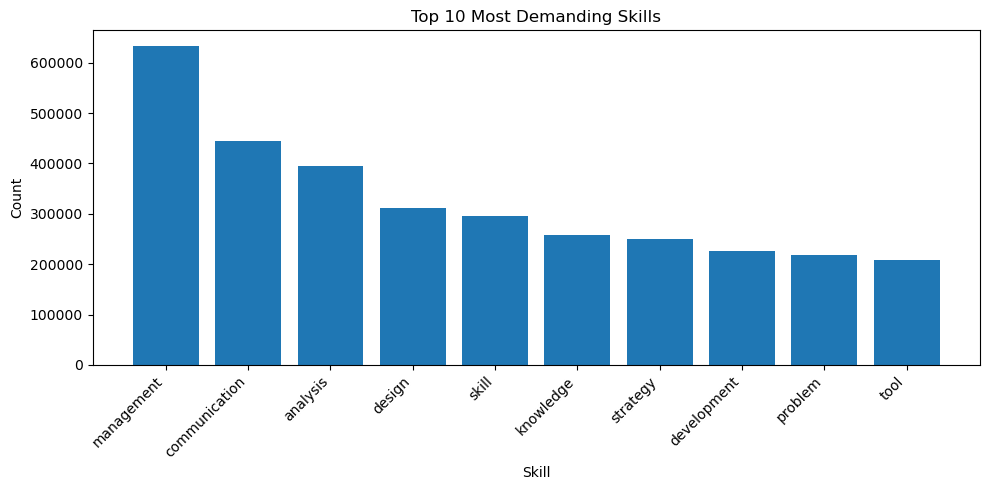

In [14]:
df['skills_list'] = df['skills'].apply(extract_skills)
all_skills = [skill for sublist in df['skills_list'] for skill in sublist] #Flattens list of lists
skills_counts = Counter(all_skills)
most_common_skills = skills_counts.most_common(10) # Top 10 skills

print("Most Demanding Skills:")
for skill, count in most_common_skills:
    print(f"- {skill}: {count}")

# Visualization (bar chart)
skills, counts = zip(*most_common_skills)
plt.figure(figsize=(10, 5))
plt.bar(skills, counts)
plt.xlabel("Skill")
plt.ylabel("Count")
plt.title("Top 10 Most Demanding Skills")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 2. Least Demanding Skills


Least Demanding Skills:
- conversion: 3306
- nvivo: 3321
- science: 3321
- stata: 3321
- implementation: 3321
- ethnographic: 3321
- forecast: 3342
- stock: 3342
- flair: 3353
- microstation: 3356


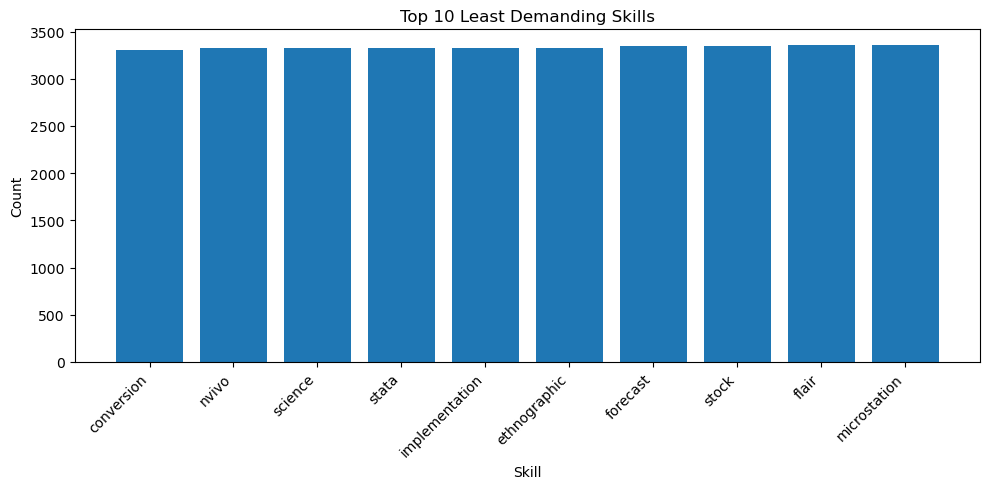

In [15]:
least_common_skills = skills_counts.most_common()[:-11:-1]  # Bottom 10 skills
print("\nLeast Demanding Skills:")
for skill, count in least_common_skills:
    print(f"- {skill}: {count}")

# Visualization (bar chart)
skills, counts = zip(*least_common_skills)
plt.figure(figsize=(10, 5))
plt.bar(skills, counts)
plt.xlabel("Skill")
plt.ylabel("Count")
plt.title("Top 10 Least Demanding Skills")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 3. Most Demanding Qualifications


Most Demanding Qualifications:
Qualifications
BBA       162148
BA        162138
BCA       161733
M.Tech    161719
PhD       161662
MBA       161537
B.Tech    161443
M.Com     161396
B.Com     161298
MCA       160866
Name: count, dtype: int64


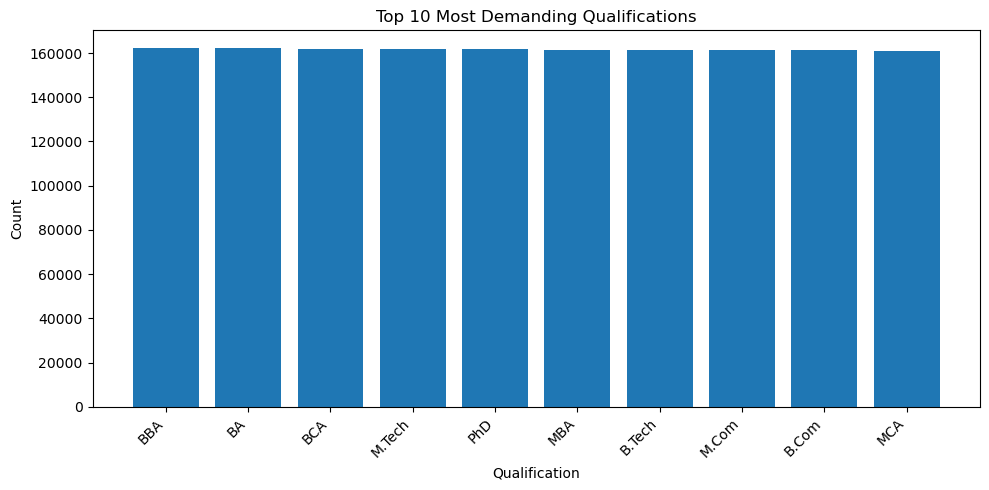

In [16]:
qualifications_counts = df['Qualifications'].value_counts().head(10)
print("\nMost Demanding Qualifications:")
print(qualifications_counts)

# Visualization (bar chart)
qualifications = qualifications_counts.index
counts = qualifications_counts.values
plt.figure(figsize=(10, 5))
plt.bar(qualifications, counts)
plt.xlabel("Qualification")
plt.ylabel("Count")
plt.title("Top 10 Most Demanding Qualifications")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 4. Most Demanding Jobs


Most Demanding Jobs:
Job Title
UX/UI Designer                  48551
Digital Marketing Specialist    27975
Software Engineer               27630
Network Engineer                24393
Software Tester                 20945
Executive Assistant             20776
Procurement Manager             20734
Financial Advisor               20687
Sales Representative            17664
Social Media Manager            17613
Name: count, dtype: int64


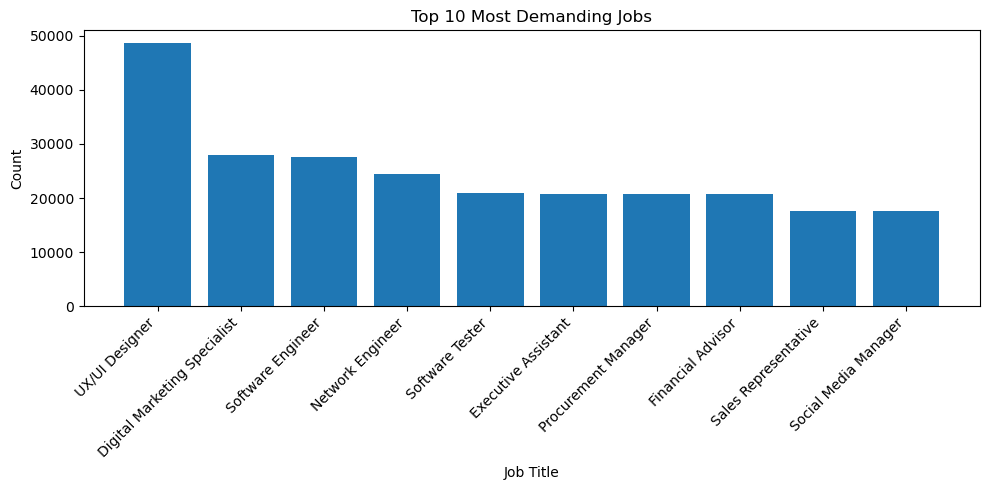

In [17]:
job_title_counts = df['Job Title'].value_counts().head(10)
print("\nMost Demanding Jobs:")
print(job_title_counts)

# Visualization (bar chart)
jobs = job_title_counts.index
counts = job_title_counts.values
plt.figure(figsize=(10, 5))
plt.bar(jobs, counts)
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 10 Most Demanding Jobs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 5. Least Demanding Jobs


Least Demanding Jobs:
Job Title
Event Manager              3494
Network Analyst            3482
Sales Associate            3482
IT Administrator           3476
Investment Advisor         3452
Personal Assistant         3441
QA Engineer                3439
Procurement Coordinator    3424
Key Account Manager        3411
Inventory Analyst          3342
Name: count, dtype: int64


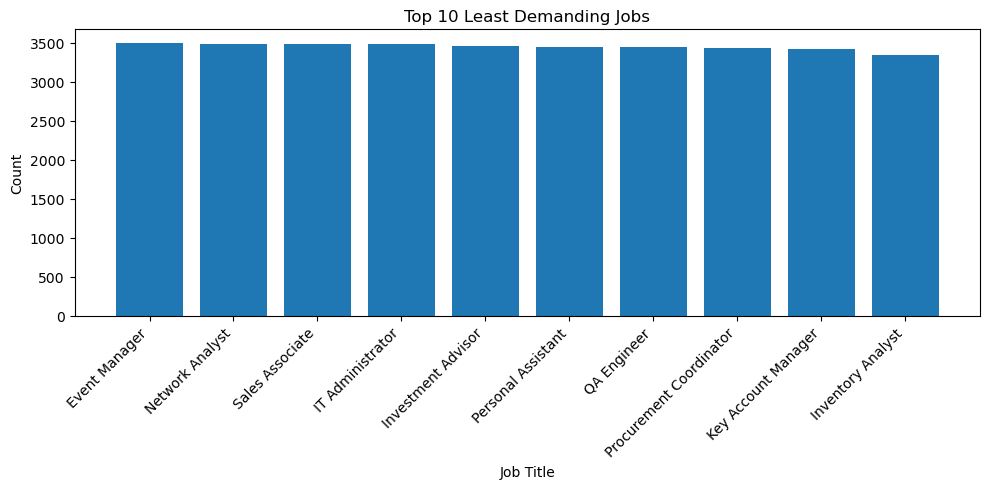

In [18]:

least_demanding_jobs = df['Job Title'].value_counts().tail(10)
print("\nLeast Demanding Jobs:")
print(least_demanding_jobs)

# Visualization (bar chart)
jobs = least_demanding_jobs.index
counts = least_demanding_jobs.values
plt.figure(figsize=(10, 5))
plt.bar(jobs, counts)
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.title("Top 10 Least Demanding Jobs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()